In [1]:
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd drive/MyDrive/

/content/drive/MyDrive


In [4]:
X_ai = pickle.load(open('X_ai.pkl','rb'))
y_ai = pickle.load(open('y_ai.pkl','rb'))

In [5]:
X_dl = pickle.load(open('X_dl.pkl','rb'))
y_dl = pickle.load(open('y_dl.pkl','rb'))

In [6]:
X_ai = X_ai/255


In [7]:
X_dl = X_dl / 255

In [8]:
X_ai.shape

(23000, 100, 100, 3)

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
early_stop = EarlyStopping(monitor='val_loss',patience=1,mode='min',verbose=1,restore_best_weights=True)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
import tensorflow as tf
import tensorflow

In [12]:
model = tensorflow.keras.models.Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu',input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1), padding='valid'))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1),padding='valid'))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1), padding='valid'))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1),padding='valid'))

model.add(Flatten())

model.add(Dense(64,activation='relu'))

model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [13]:
model.fit(X_ai,y_ai,epochs=5,validation_data=(X_dl,y_dl),batch_size=64,callbacks=[early_stop])


Epoch 1/5
360/360 [==============================] - 72s 115ms/step - loss: 0.7570 - accuracy: 0.5486 - val_loss: 0.6627 - val_accuracy: 0.6045
Epoch 2/5
360/360 [==============================] - 41s 115ms/step - loss: 0.6370 - accuracy: 0.6297 - val_loss: 0.6151 - val_accuracy: 0.6700
Epoch 3/5
360/360 [==============================] - 41s 114ms/step - loss: 0.5590 - accuracy: 0.7047 - val_loss: 0.5628 - val_accuracy: 0.7040
Epoch 4/5
360/360 [==============================] - 41s 113ms/step - loss: 0.4711 - accuracy: 0.7725 - val_loss: 0.5076 - val_accuracy: 0.7610
Epoch 5/5
360/360 [==============================] - 41s 114ms/step - loss: 0.3800 - accuracy: 0.8263 - val_loss: 0.4797 - val_accuracy: 0.7880


In [14]:
import pandas as pd
df = pd.DataFrame(model.history.history)

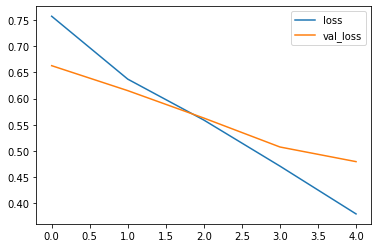

In [15]:
df[['loss','val_loss']].plot()

In [16]:
test_loss, accuracy = model.evaluate(X_dl,y_dl)

63/63 [==============================] - 2s 17ms/step - loss: 0.4797 - accuracy: 0.7880


In [17]:
print(accuracy)

0.7879999876022339


In [18]:
from sklearn.metrics import classification_report

In [19]:
predictions = model.predict_classes(X_dl)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [20]:
print(classification_report(y_dl,predictions))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1000
           1       0.77      0.83      0.80      1000

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000



In [21]:
#accuracy with paddig='same' = 0.77

[62 51 53 36 37 53 90 80 30 29 84 32 47 47 85 78 76 47 60 73]


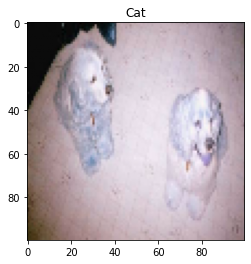

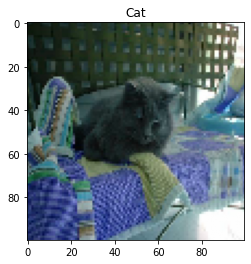

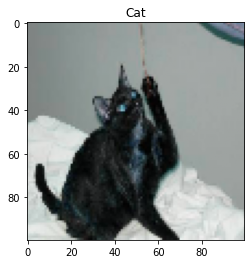

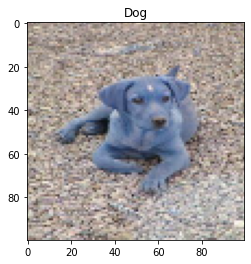

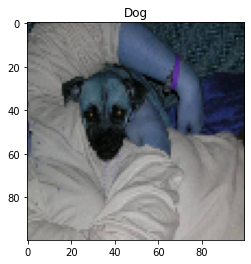

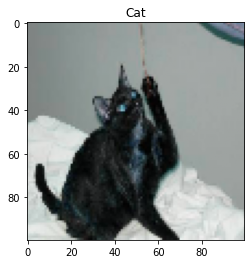

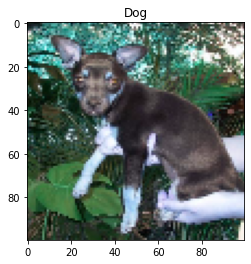

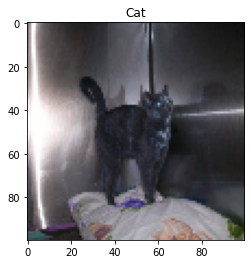

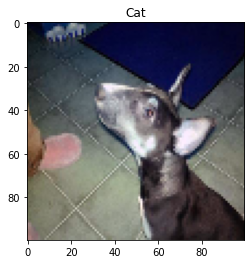

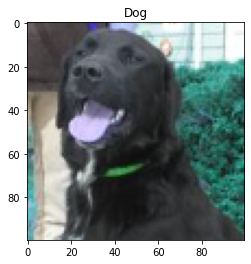

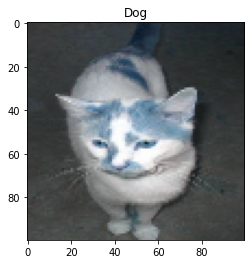

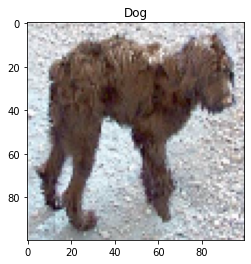

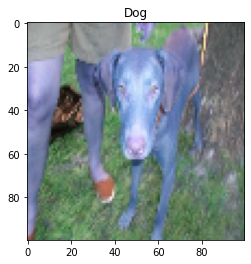

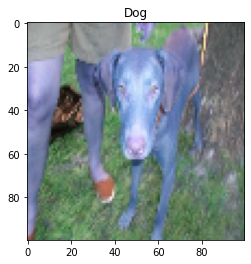

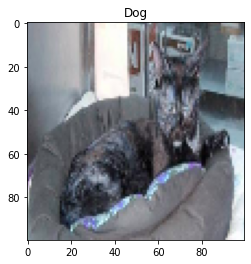

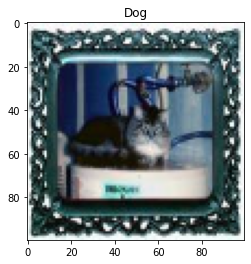

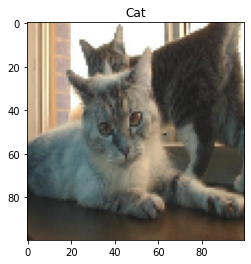

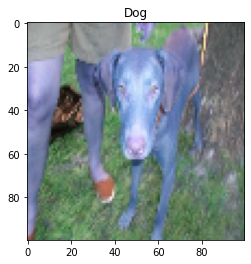

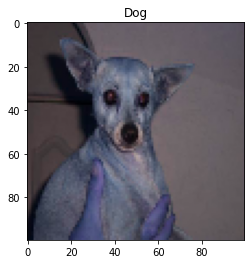

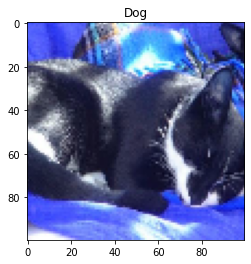

In [22]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

imgs = np.random.randint(25,100,20)
print(imgs)

for i in imgs:
  model.out = np.argmax(model.predict(X_dl[i].reshape(1,100,100,3)))
  if model.out == 0:
    str_label = "Cat"
  else:
    str_label = "Dog"

  #print(model.out)
  plt.tight_layout()
  plt.title(str_label)
  plt.show(plt.imshow(X_dl[i]))


[48 34 15  5  3 38 40  1  6 46]


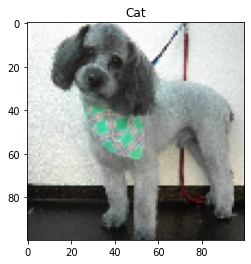

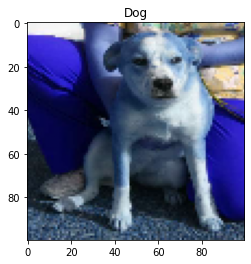

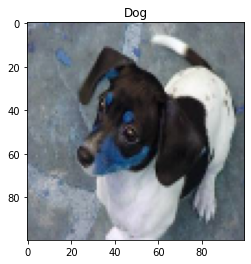

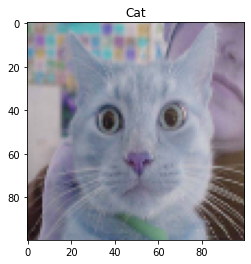

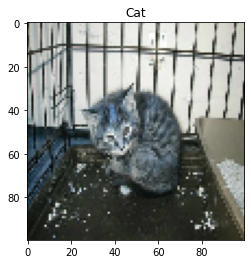

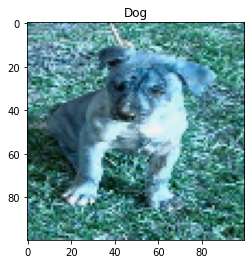

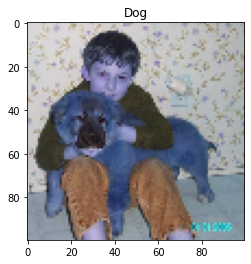

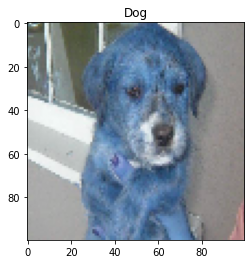

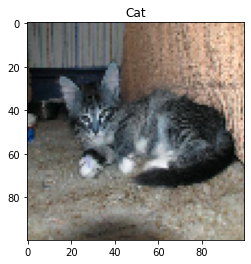

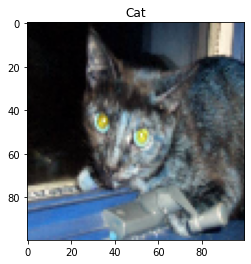

In [23]:
fig = plt.figure()

imgs = np.random.randint(1,50,10)
print(imgs)

for i in imgs:
  model.out = np.argmax(model.predict(X_dl[i].reshape(1,100,100,3)))
  if model.out == 0:
    str_label = "Cat"
  else:
    str_label = "Dog"

  #print(model.out)
  plt.tight_layout()
  plt.title(str_label)
  plt.show(plt.imshow(X_dl[i]))